## Building Autoencoders

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3607 - val_loss: 0.1724
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1640 - val_loss: 0.1361
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1337 - val_loss: 0.1225
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1220 - val_loss: 0.1149
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1148 - val_loss: 0.1092
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1099 - val_loss: 0.1058
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1066 - val_loss: 0.1037
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1046 - val_loss: 0.1022
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1032 - val_loss: 0.1007
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1021 - val_loss: 0.0999
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1007 - val_loss: 0.0987
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


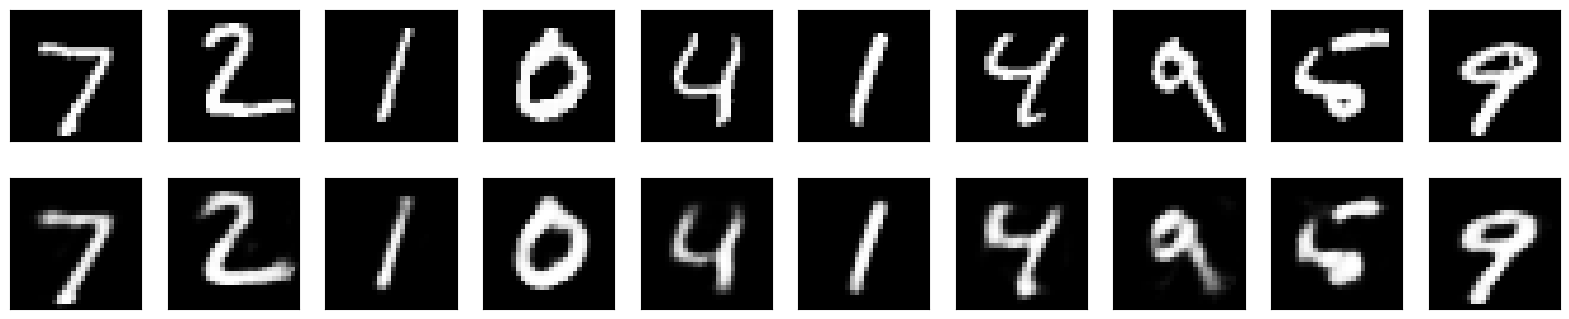

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

### Fine-Tuning the Autoencoder

In [5]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0928 - val_loss: 0.0905
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0917 - val_loss: 0.0904
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0916 - val_loss: 0.0902
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0912 - val_loss: 0.0899
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0908 - val_loss: 0.0897
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0906 - val_loss: 0.0895
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0905 - val_loss: 0.0895
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0904 - val_loss: 0.0892
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0902 - val_loss: 0.0891
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0903 - val_loss: 0.0890


### Denoising Images with Autoencoder

- comparing the noisy, denoised, and original images.

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2068 - val_loss: 0.1429
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1411 - val_loss: 0.1334
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1331 - val_loss: 0.1293
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1293 - val_loss: 0.1271
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1273 - val_loss: 0.1255
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1257 - val_loss: 0.1248
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1248 - val_loss: 0.1235
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1241 - val_loss: 0.1229
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1235 - val_loss: 0.1237
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1231 - val_loss: 0.1228
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1229 - val_loss: 0.1222
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1

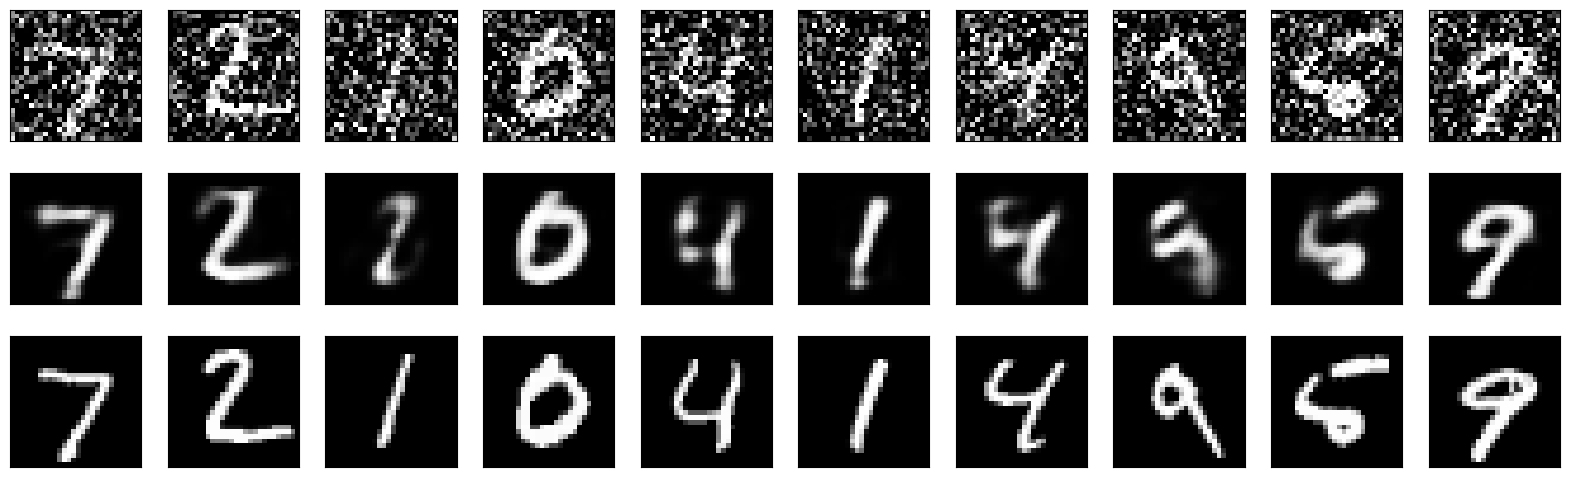

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


### Exploring Different Bottleneck Sizes